In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, time, datetime, timedelta
from dateutil import parser

In [3]:
weather = pd.read_csv("/Users/florianlichius/Daten/Boston")

In [4]:
weather.describe()
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82777 entries, 0 to 82776
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     82777 non-null  object        
 1   timestamp                82777 non-null  datetime64[ns]
 2   temperature              82773 non-null  float64       
 3   cloud_cover              82777 non-null  int64         
 4   cloud_cover_description  82777 non-null  object        
 5   pressure                 82768 non-null  float64       
 6   windspeed                82740 non-null  float64       
 7   precipitation            82777 non-null  float64       
 8   felt_temperature         82752 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
weather.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,82773.000000,82777.000000,82768.000000,82740.000000,82777.000000,82752.000000
mean,11.507400,26.226742,1015.100027,17.846423,0.178757,9.639272
std,9.779305,7.400364,8.729906,9.133295,0.945288,12.111133
min,-23.000000,4.000000,704.210000,0.000000,0.000000,-38.000000
25%,4.000000,26.000000,1009.780000,11.000000,0.000000,0.000000
50%,12.000000,27.000000,1015.190000,17.000000,0.000000,12.000000
75%,19.000000,33.000000,1020.610000,22.000000,0.000000,19.000000
max,37.000000,47.000000,1044.970000,178.000000,35.810000,41.000000


In [6]:
weather.isnull().sum()

city                        0
timestamp                   0
temperature                 4
cloud_cover                 0
cloud_cover_description     0
pressure                    9
windspeed                  37
precipitation               0
felt_temperature           25
dtype: int64

In [7]:
#get null values
weather[weather.isnull().any(axis=1)]

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
2116,Boston,2015-03-11 08:56:00,NaN,20,Fog,1008.76,13.0,0.00,NaN
2301,Boston,2015-03-17 16:54:00,7.0,28,Mostly Cloudy,995.91,NaN,0.00,NaN
2794,Boston,2015-04-04 03:31:00,7.0,26,Cloudy,1003.69,NaN,0.00,NaN
2795,Boston,2015-04-04 03:50:00,8.0,26,Cloudy,1003.35,NaN,0.00,NaN
2796,Boston,2015-04-04 03:54:00,8.0,26,Cloudy,1003.35,NaN,0.00,NaN
2798,Boston,2015-04-04 04:51:00,8.0,20,Fog,1002.00,NaN,0.00,NaN
2799,Boston,2015-04-04 04:52:00,8.0,20,Fog,1002.00,NaN,0.00,NaN
2810,Boston,2015-04-04 08:54:00,8.0,11,Light Rain,995.91,NaN,0.00,NaN
2811,Boston,2015-04-04 09:10:00,8.0,11,Light Rain,994.89,NaN,0.00,NaN
2812,Boston,2015-04-04 09:54:00,8.0,4,T-Storm,995.23,NaN,6.60,NaN


In [37]:
#drop row
weather = weather.dropna(axis=0, how='any')



KeyboardInterrupt: 

In [9]:

type(weather['timestamp'][0])
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
type(weather['timestamp'])

pandas.core.series.Series

In [31]:
smallest = parser.parse('2017-01-01')
biggest = parser.parse('2018-12-31')
weather1718 = weather[weather['timestamp'] >= smallest]
weather1718 = weather1718[weather1718['timestamp'] <= biggest]
weather1718.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21076 entries, 20512 to 41587
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     21076 non-null  object        
 1   timestamp                21076 non-null  datetime64[ns]
 2   temperature              21075 non-null  float64       
 3   cloud_cover              21076 non-null  int64         
 4   cloud_cover_description  21076 non-null  object        
 5   pressure                 21072 non-null  float64       
 6   windspeed                21061 non-null  float64       
 7   precipitation            21076 non-null  float64       
 8   felt_temperature         21065 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [12]:
weather1718.isnull().sum().sum()

31

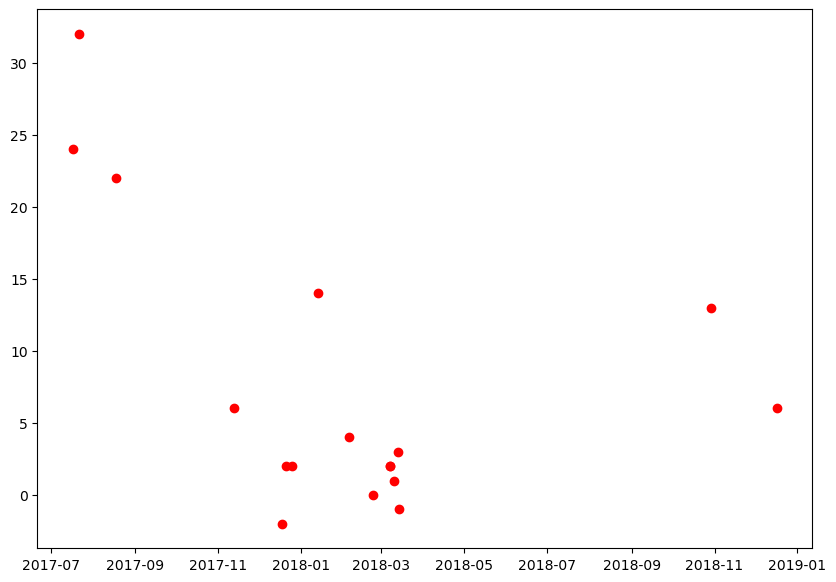

In [30]:
null_values = weather1718[weather1718.isnull().any(axis=1)].copy()
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(null_values['timestamp'], null_values['temperature'],color='red')

In [38]:
# 31 von 21076 Werten sind null, daher ist löschen ok
weather1718 = weather1718.dropna(axis=0, how='any')
weather1718.isnull().sum().sum()
weather1718.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,21058.000000,21058.000000,21058.000000,21058.000000,21058.000000,21058.000000
mean,11.346899,25.923402,1015.120388,18.488650,0.206311,9.348894
std,9.854228,7.610257,8.968663,9.480032,1.024529,12.312669
min,-19.000000,4.000000,976.280000,0.000000,0.000000,-33.000000
25%,3.000000,26.000000,1010.120000,11.000000,0.000000,-1.000000
50%,11.000000,27.000000,1015.190000,17.000000,0.000000,11.000000
75%,19.000000,33.000000,1020.950000,24.000000,0.000000,19.000000
max,36.000000,47.000000,1043.960000,78.000000,27.940000,41.000000


In [11]:
weather1718.sum()

/var/folders/35/nxlk80897mn6vmrkstqf1cg80000gn/T/ipykernel_11147/1895593093.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather1718.sum()


city                       BostonBostonBostonBostonBostonBostonBostonBost...
temperature                                                         239073.0
cloud_cover                                                           546331
cloud_cover_description    CloudyLight RainLight RainLight Rain / WindyLi...
pressure                                                         21390284.86
windspeed                                                           389382.0
precipitation                                                        4350.07
felt_temperature                                                    196963.0
dtype: object

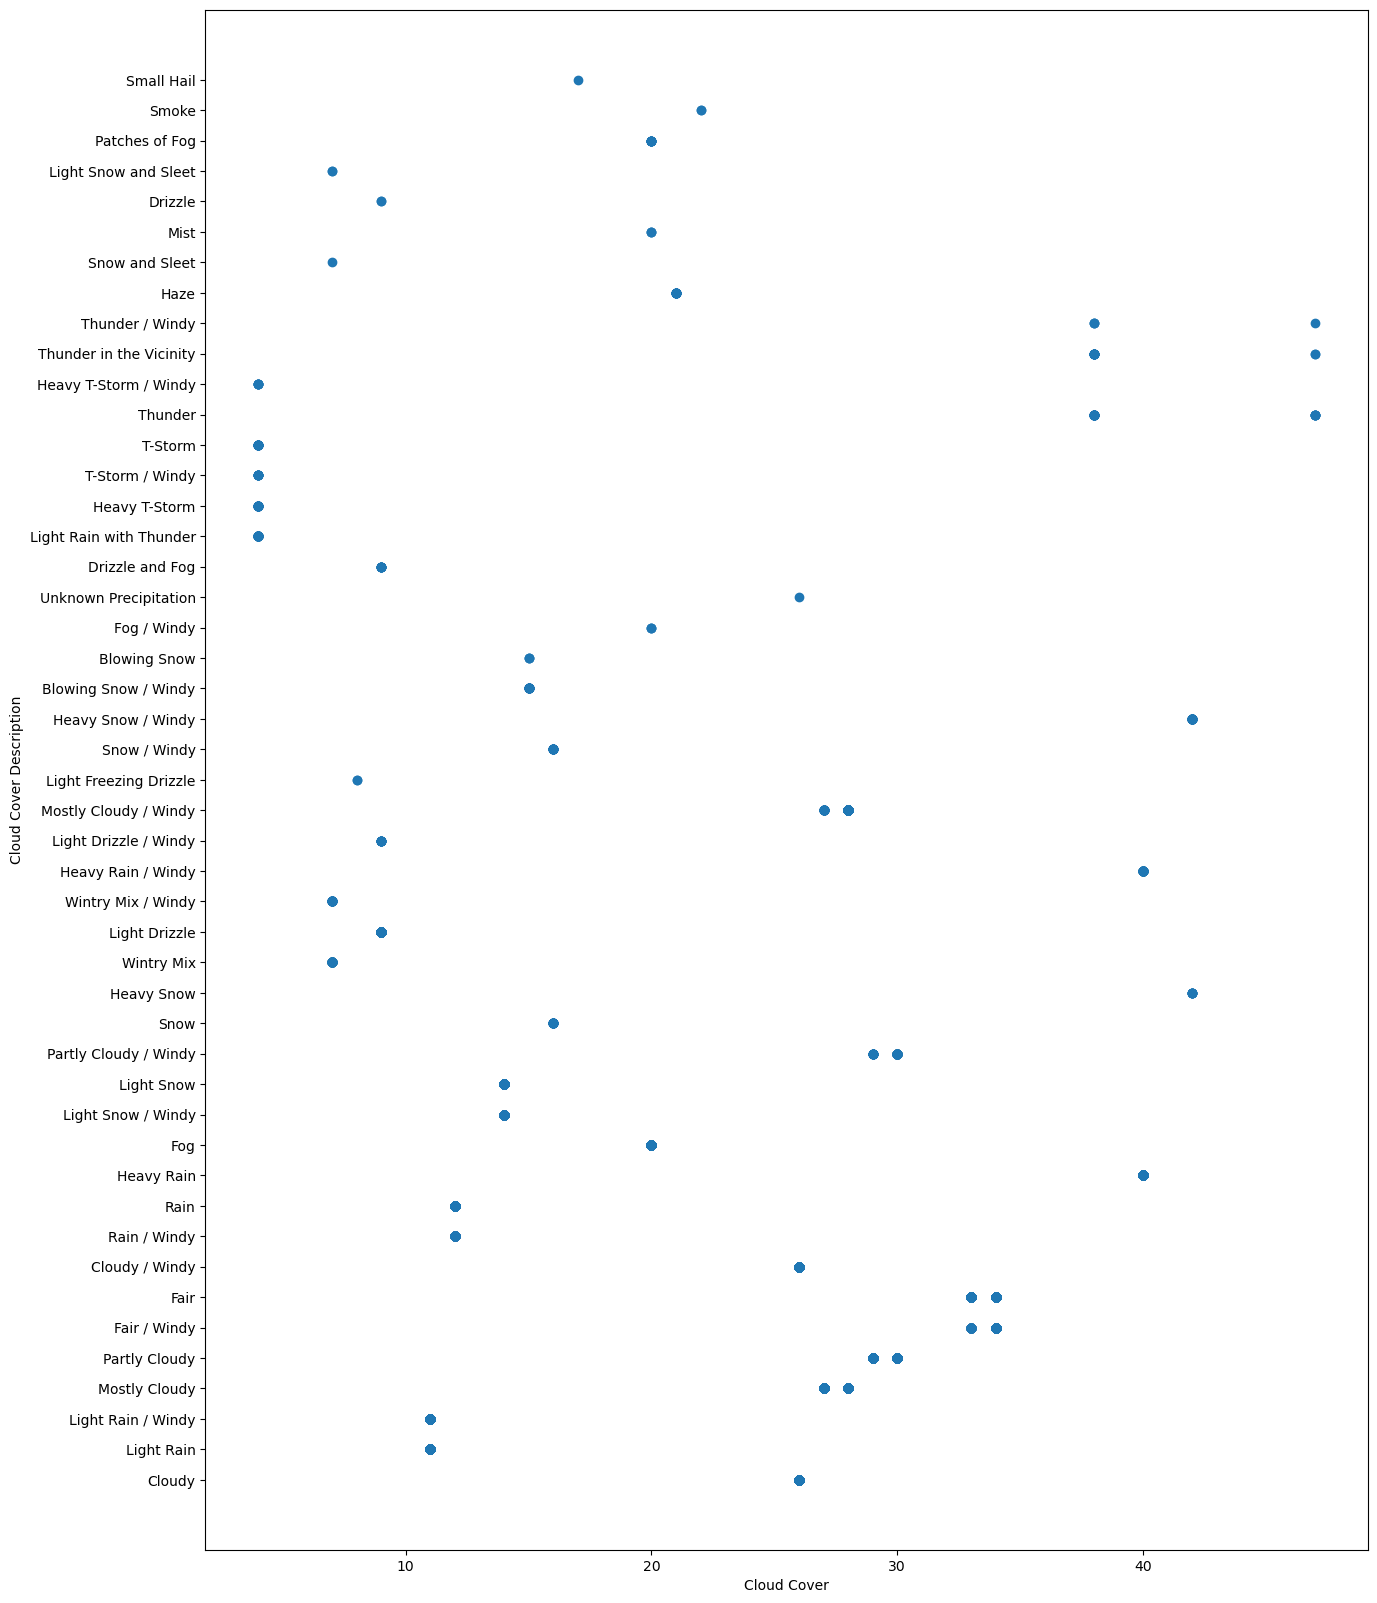

In [40]:
#plot cloudcover against cloud_cover_description use a different color
fig, ax = plt.subplots(figsize=(10,7))

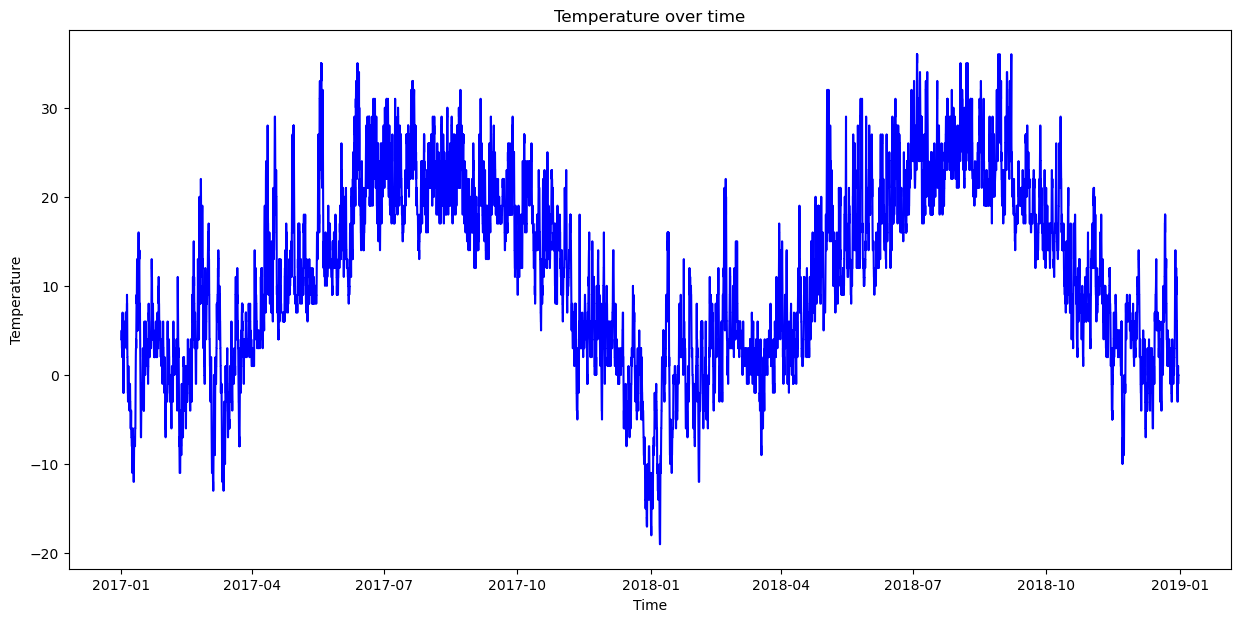

In [37]:
#plot weather data tempature as y and x as time
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather1718['timestamp'], weather1718['temperature'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature over time')
plt.show()

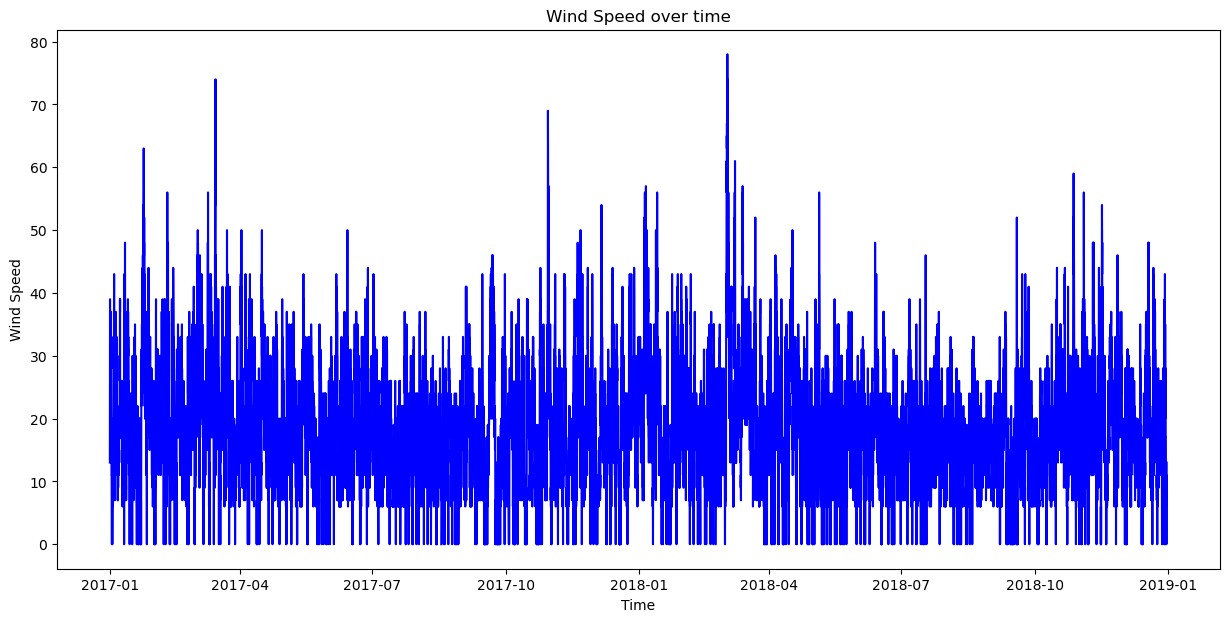

In [13]:
#plot windspeed over time
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather1718['timestamp'], weather1718['windspeed'], color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed over time')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x13f2c08b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13f2c0df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f2c0610>,
 'medians': [<matplotlib.lines.Line2D at 0x13f262d70>,
 'fliers': [<matplotlib.lines.Line2D at 0x13f260df0>,
 'means': []}

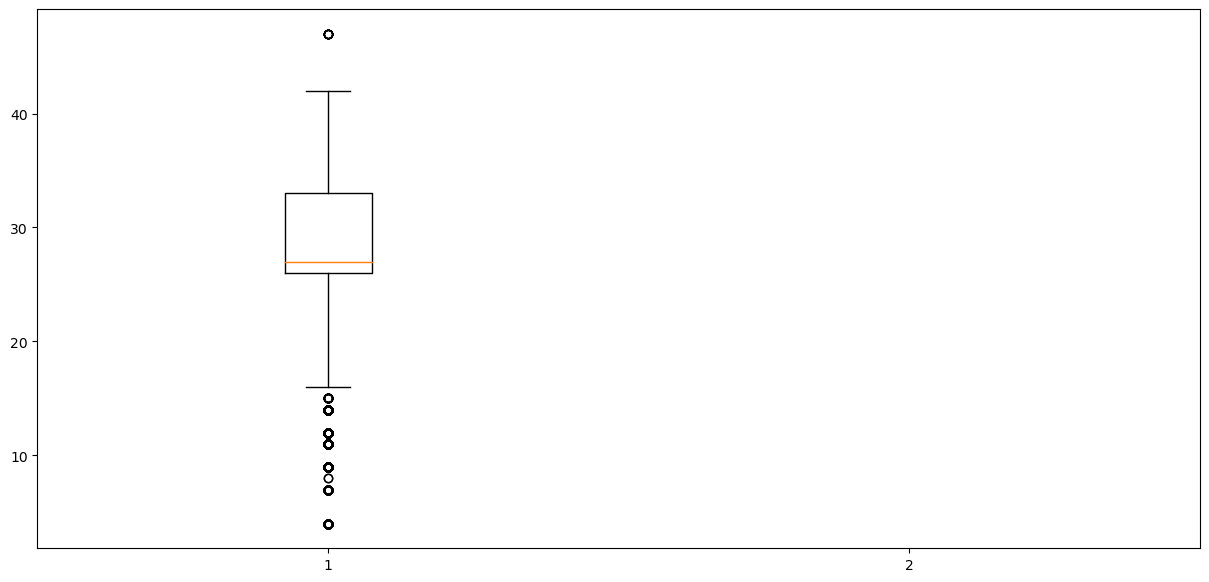

In [14]:
#boxplot cloud cover and pressure 
fig, ax = plt.subplots(figsize=(15,7))



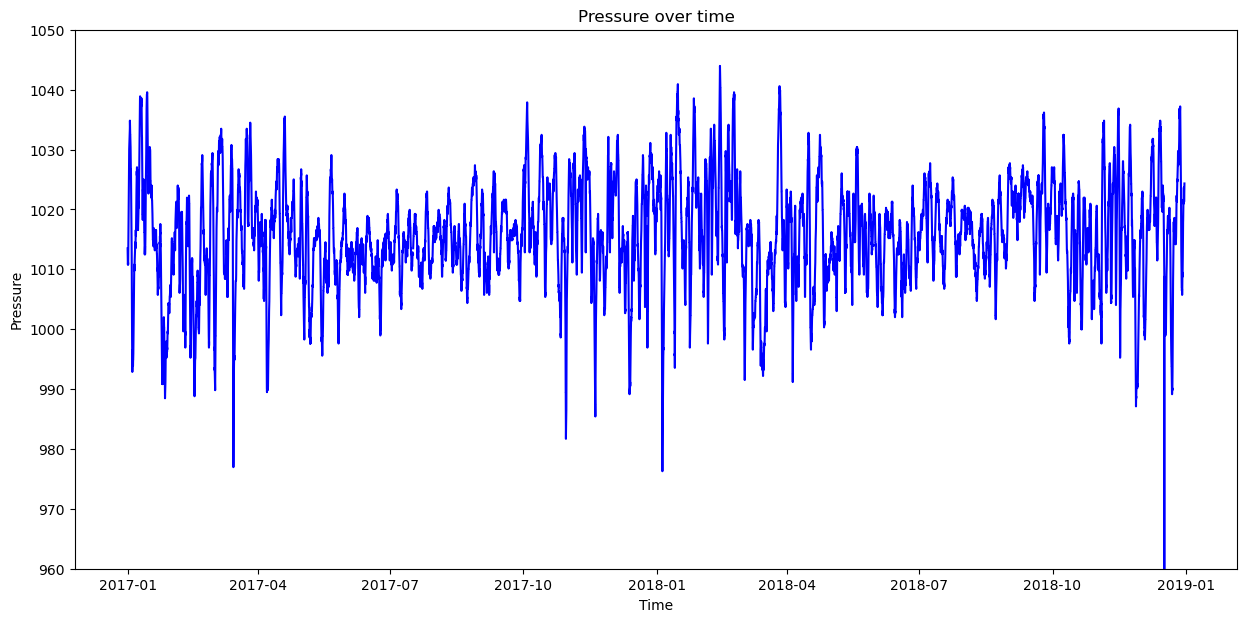

In [15]:
#plot pressure over time 
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(weather1718['timestamp'], weather1718['pressure'], color='blue')
ax.set_ylim(960,1050)
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure over time')
plt.show()